<a href="https://colab.research.google.com/github/sanjivpolamuri/sanjiv-eztraining-python/blob/main/employee_burnout_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/burnoutpred (Unzipped Files)/train.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [ ]:
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
#giving the number of rows and columns
burnoutDf.shape

(22750, 9)

In [ ]:
#general info
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
#check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
#check for duplicate values
burnoutDf.duplicated().sum()

0

In [ ]:
#calculate mean,std,min,max,count of every attribute
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
#show unique values
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")





['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
#drop irrelevant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
#check the skewness of attribute
intFloatburnoutDf=burnoutDf.select_dtypes([np.int, np. float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew() >= 0.1):
    print("\n",col, "feature is Positively skewed and value is: ", intFloatburnoutDf[col].skew())
  elif (intFloatburnoutDf[col].skew() <= -0.1):
    print("\n",col, "feature is Negtively Skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed and value is: ", intFloatburnoutDf[col].skew())


 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negtively Skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


<ipython-input-27-1dd4ffc35555>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  intFloatburnoutDf=burnoutDf.select_dtypes([np.int, np. float])
<ipython-input-27-1dd4ffc35555>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Replace the null values with mean

burnoutDf[ 'Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(), inplace=True)
burnoutDf[ 'Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(), inplace=True)
burnoutDf[ 'Burn Rate'].fillna(burnoutDf[ 'Burn Rate'].mean(), inplace=True)

In [ ]:
# check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
#check for correlation
burnoutDf.corr()

<ipython-input-32-b7a29afba1ca>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


# **DATA** **VISUALIZATION**


In [ ]:
# Plotting Heat map to check Correlation
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize': (14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

<ipython-input-33-fc311e3a4d7b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



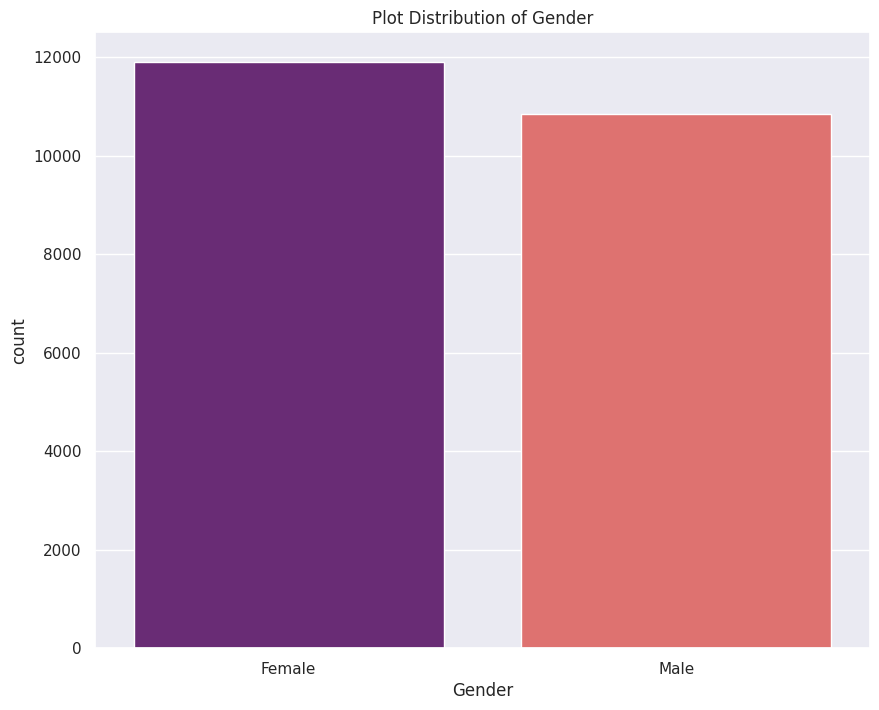

In [ ]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

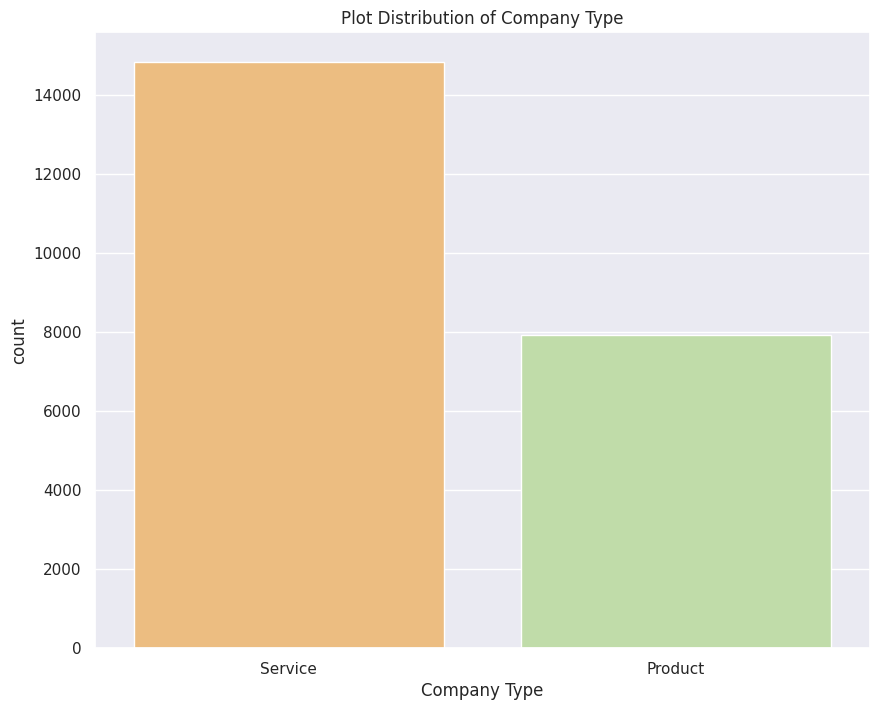

In [ ]:
# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

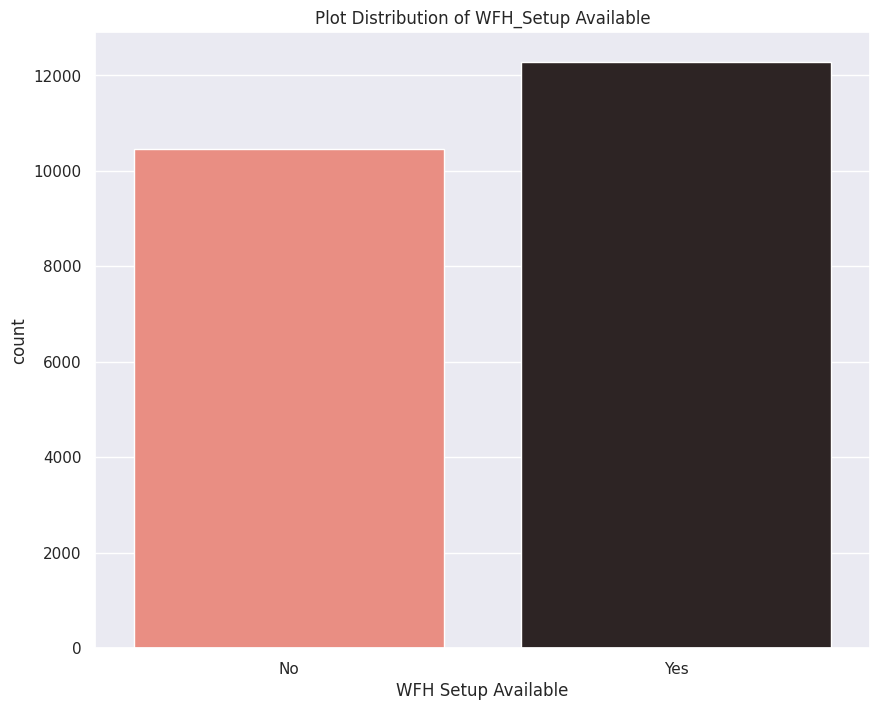

In [ ]:
# Count plot distribution of "WFH Setup Available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDf, palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup Available")
plt.show()

In [ ]:
#Count-Plot Distribution of attributes with the help of Histogram
burn_st=burnoutDf. loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram(burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=['indianred'])
  fig.update_layout (bargap=0.2)
  fig.show()

In [ ]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Plot distribution of Burn rate on the basis of Gender
fig = px.line(burnoutDf, y="Burn Rate", color="Gender", title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Plot distribution of mental fatigue score on the basis of Designation
fig = px.line(burnoutDf, y="Mental Fatigue Score", color="Designation", title="Mental Fatigue Score vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

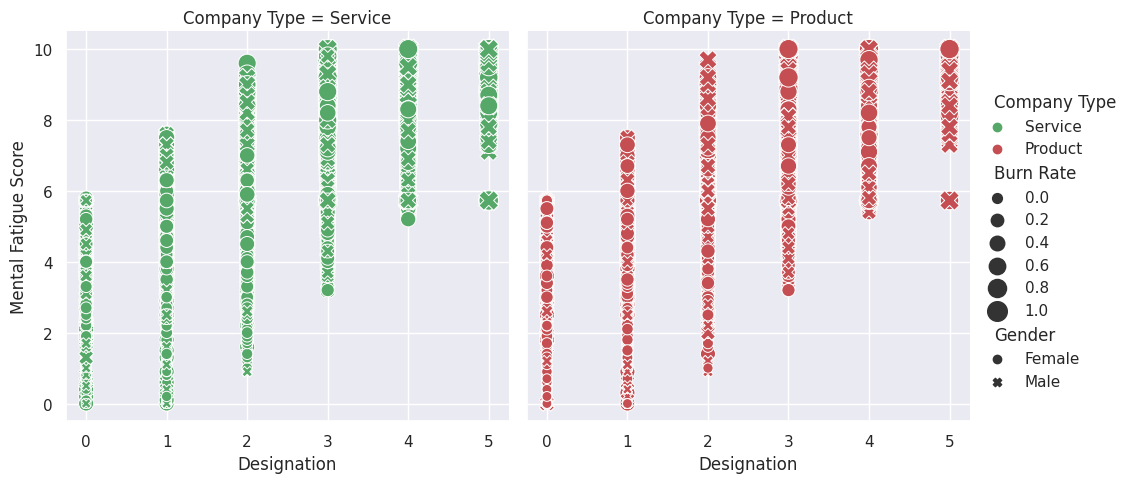

In [ ]:
# Plot Distribution of "Designation vs mental fatigue" as per Company type, Burn rate and Gender
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

# **Label** **Encoding**

In [ ]:
# label encoding and assign in new variable
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [ ]:
# Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf[ 'Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf[ 'WFH_Setup_Availablelabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [ ]:
# check assigned values
gn= burnoutDf.groupby('Gender')
gn= gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
#check assigned values
ct = burnoutDf.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
#check assigned values
wsa = burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_Availablelabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_Availablelabel, dtype: int64

In [ ]:
#show last 10 rows
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company TypeLabel,WFH_Setup_Availablelabel,Company_TypeLabel
22740,2008-09-05,Female,Product,No,3.0,6.0,7.300000,0.550000,0,0,0,0
22741,2008-01-07,Male,Product,No,2.0,5.0,6.000000,0.452005,1,0,0,0
22742,2008-07-28,Male,Product,No,3.0,5.0,8.100000,0.690000,1,0,0,0
22743,2008-12-15,Female,Product,Yes,1.0,3.0,6.000000,0.480000,0,0,1,0
22744,2008-05-27,Male,Product,No,3.0,7.0,6.200000,0.540000,1,0,0,0
22745,2008-12-30,Female,Service,No,1.0,3.0,5.728188,0.410000,0,1,0,1
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.700000,0.590000,0,0,1,0
22747,2008-11-05,Male,Service,Yes,3.0,7.0,5.728188,0.720000,1,1,1,1
22748,2008-01-10,Female,Service,No,2.0,5.0,5.900000,0.520000,0,1,0,1
22749,2008-01-06,Male,Product,No,3.0,6.0,7.800000,0.610000,1,0,0,0


# **Feature** **Selection**

In [ ]:
# Feature selection
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'GenderLabel', 'Company_TypeLabel','WFH_Setup_Availablelabel']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']


In [ ]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0              2.0             3.000000              3.800000            0   
1              1.0             2.000000              5.000000            1   
2              2.0             4.481398              5.800000            0   
3              1.0             1.000000              2.600000            1   
4              3.0             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745          1.0             3.000000              5.728188            0   
22746          3.0             6.000000              6.700000            0   
22747          3.0             7.000000              5.728188            1   
22748          2.0             5.000000              5.900000            0   
22749          3.0             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_Availablelabel  
0         

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# **Implementing** **PCA**

In [ ]:
# Principle component Analyssis
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

print("PCA shape of X is: ",X_pca.shape, "and orignal shape is: ", X.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)

PCA shape of X is:  (22750, 4) and orignal shape is:  (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is: 4


## **Data Spliting**

In [ ]:
#Data Splitting in train and test
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test =train_test_split(X_pca,y, test_size = 0.25, random_state=10)

In [ ]:
#print the shape of splitted data
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


# **Model** **Implementation**

### **Random** **Forest** **Regressor**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)
train_pred_rf = rf_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_rf)
test_pred_rf =rf_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_rf)
# Accuracy score
print("Accuracy score of train data: "+str(round (100*train_r2, 4))+"%")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+" %")

Accuracy score of train data: 91.1956%
Accuracy score of test data: 83.8225 %


## **Adaboost** **Regressor**

In [ ]:
# AdaBoost regressor

from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)

train_pred_adboost = abr_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_adboost)
test_pred_adaboost = abr_model.predict(X_test)
test_r2= r2_score (Y_test, test_pred_adaboost)

# Accuracy score
print("Accuracy score of train data: "+str(round (100*train_r2, 4))+" %")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+" %")

Accuracy score of train data: 77.4612 %
Accuracy score of test data: 76.8841 %
